In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from collections import defaultdict

SECOND = 1e12

## Process data

In [101]:
seeds = list(range(20))
X = list(range(110))

In [107]:
# no ACP
logfile = 'bottleneck20,ma=0,up=False,ns={},qs=0,s=freshest,pf=False'

data_ma0_tts = defaultdict(list)
data_ma0_fid = defaultdict(list)
for s in seeds:
    with open(logfile.format(s), 'r') as f:
        for line in f:
            if 'time to serve' in line:
                line = line.split()
                tts = line[13]  # time to serve
                i, j = tts.find('='), -1
                tts = float(tts[i+1:j])
                fidelity = line[14]
                i, j = fidelity.find('='), len(fidelity)
                fidelity = float(fidelity[i+1:j])
                data_ma0_tts[s].append(tts)
                data_ma0_fid[s].append(fidelity)
        
y_ma0_tts = []
y_ma0_fid = []
for x in X:
    datapoints = []
    for s in seeds:
        datapoints.append(data_ma0_tts[s][x])
    y_ma0_tts.append(np.average(datapoints))
    
    datapoints = []
    for s in seeds:
        datapoints.append(data_ma0_fid[s][x])
    y_ma0_fid.append(np.average(datapoints))

print(np.average(y_ma0_tts), np.average(y_ma0_fid))

12.467455333863638 0.8469671250000002


In [108]:
# UCP (ACP + no update), purify
logfile = 'bottleneck20,ma=5,up=False,ns={},qs=0,s=freshest,pf=True'

data_ma5_tts = defaultdict(list)
data_ma5_fid = defaultdict(list)
for s in seeds:
    with open(logfile.format(s), 'r') as f:
        for line in f:
            if 'time to serve' in line:
                line = line.split()
                tts = line[13]  # time to serve
                i, j = tts.find('='), -1
                tts = float(tts[i+1:j])
                fidelity = line[14]
                i, j = fidelity.find('='), len(fidelity)
                fidelity = float(fidelity[i+1:j])
                data_ma5_tts[s].append(tts)
                data_ma5_fid[s].append(fidelity)

y_ma5_ucp_tts = []
y_ma5_ucp_fid = []
for x in X:
    datapoints = []
    for s in seeds:
        datapoints.append(data_ma5_tts[s][x])
    y_ma5_ucp_tts.append(np.average(datapoints))
    
    datapoints = []
    for s in seeds:
        datapoints.append(data_ma5_fid[s][x])
    y_ma5_ucp_fid.append(np.average(datapoints))

print(np.average(y_ma5_ucp_tts), np.average(y_ma5_ucp_fid))

10.217612896068186 0.8372902899999999


In [109]:
# ACP

logfile = 'bottleneck20,ma=5,up=True,ns={},qs=0,s=freshest,pf=True'

data_ma5_tts = defaultdict(list)
data_ma5_fid = defaultdict(list)
for s in seeds:
    with open(logfile.format(s), 'r') as f:
        for line in f:
            if 'time to serve' in line:
                line = line.split()
                tts = line[13]  # time to serve
                i, j = tts.find('='), -1
                tts = float(tts[i+1:j])
                fidelity = line[14]
                i, j = fidelity.find('='), len(fidelity)
                fidelity = float(fidelity[i+1:j])
                data_ma5_tts[s].append(tts)
                data_ma5_fid[s].append(fidelity)

y_ma5_acp_tts = []
y_ma5_acp_fid = []
for x in X:
    datapoints = []
    for s in seeds:
        try:
            datapoints.append(data_ma5_tts[s][x])
        except:
            print(f'x={x}, s={s}')
    y_ma5_acp_tts.append(np.average(datapoints))
    
    datapoints = []
    for s in seeds:
        try:
            datapoints.append(data_ma5_fid[s][x])
        except:
            print(f'x={x}, s={s}')
    y_ma5_acp_fid.append(np.average(datapoints))

print(np.average(y_ma5_acp_tts), np.average(y_ma5_acp_fid))

5.2928907560590925 0.8517317418181817


## Do sliding window avgerage

In [110]:
def avg(y: list, length: int) -> list:
    '''sliding window avg'''
    print(f'y length={len(y)}')
    avg = []
    for i in range(length, len(y) + 1):
        avg.append(np.average(y[i-length:i]))
    return avg

def two_parts(y: list, avg_length: int) -> list:
    length = len(y)
    half_length = length // 2
    print(f'length={length}, half length={half_length}')
    part1 = avg(y[:half_length], avg_length)
    part2 = avg(y[half_length:], avg_length-1)  # so that there is a datapoint when x=100
    return part1 + part2

In [111]:
y_ma0_tts = two_parts(y_ma0_tts, avg_length=6)
y_ma5_ucp_tts = two_parts(y_ma5_ucp_tts, avg_length=6)
y_ma5_acp_tts = two_parts(y_ma5_acp_tts, avg_length=6)

y_ma0_fid = two_parts(y_ma0_fid, avg_length=6)
y_ma5_ucp_fid = two_parts(y_ma5_ucp_fid, avg_length=6)
y_ma5_acp_fid = two_parts(y_ma5_acp_fid, avg_length=6)

length=110, half length=55
y length=55
y length=55
length=110, half length=55
y length=55
y length=55
length=110, half length=55
y length=55
y length=55
length=110, half length=55
y length=55
y length=55
length=110, half length=55
y length=55
y length=55
length=110, half length=55
y length=55
y length=55


## TTS

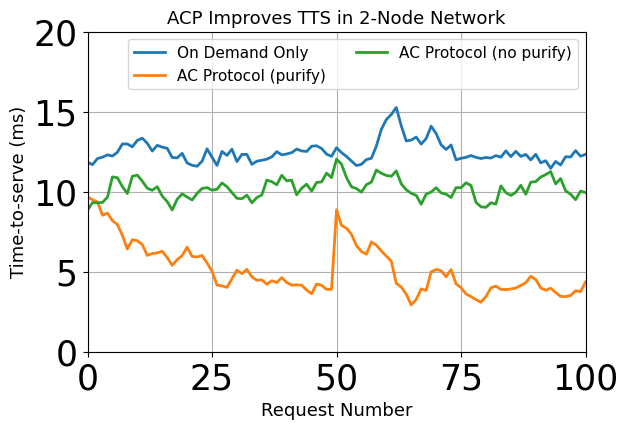

In [120]:
fig, ax = plt.subplots(figsize=(6,4))
fig.subplots_adjust(left=0.13, right=0.96, bottom=0.12, top=0.92)
ax.plot(y_ma0_tts, label=f'On Demand Only', linewidth=2)
ax.plot(y_ma5_acp_tts, label=f'AC Protocol (purify)', linewidth=2)
ax.plot(y_ma5_ucp_tts, label=f'AC Protocol (no purify)', linewidth=2)
ax.legend(ncols=2, fontsize=11)
ax.grid()
ax.set_xlim([0, 100])
ax.set_ylim([0, 20])
ax.set_xlabel('Request Number', fontsize=13)
ax.set_ylabel('Time-to-serve (ms)', fontsize=13)

ax.set_title('ACP Improves TTS in 2-Node Network', fontsize=13)
fig.savefig("20bottleneck-tts.png")

## Fidelity

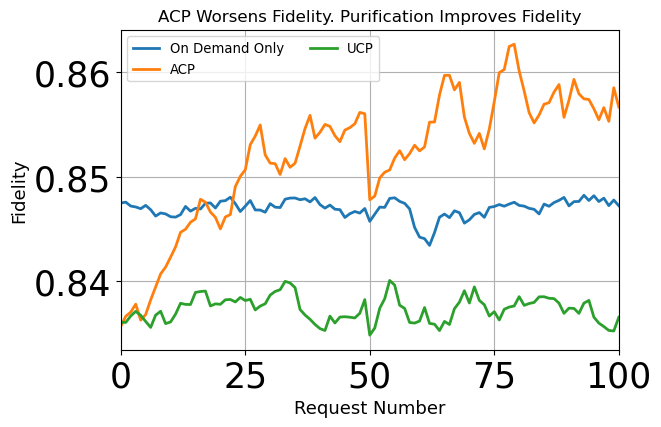

In [119]:
fig, ax = plt.subplots(figsize=(6,4))
fig.subplots_adjust(left=0.13, right=0.96, bottom=0.12, top=0.92)
ax.plot(y_ma0_fid, label=f'On Demand Only', linewidth=2)
ax.plot(y_ma5_acp_fid, label=f'ACP', linewidth=2)
ax.plot(y_ma5_ucp_fid, label=f'UCP', linewidth=2)

ax.legend(fontsize=9.5, ncols=2)
ax.grid()
ax.set_xlim([0, 100])
# ax.set_ylim([0.92, 0.98])
ax.set_xlabel('Request Number', fontsize=13)
ax.set_ylabel('Fidelity', fontsize=13)
ax.set_title('ACP Worsens Fidelity. Purification Improves Fidelity', fontsize=12)
fig.savefig('20bottleneck-fid.png')

# Put two plots into one plot

In [115]:
plt.rcParams['font.size'] = 25
plt.rcParams['lines.linewidth'] = 4

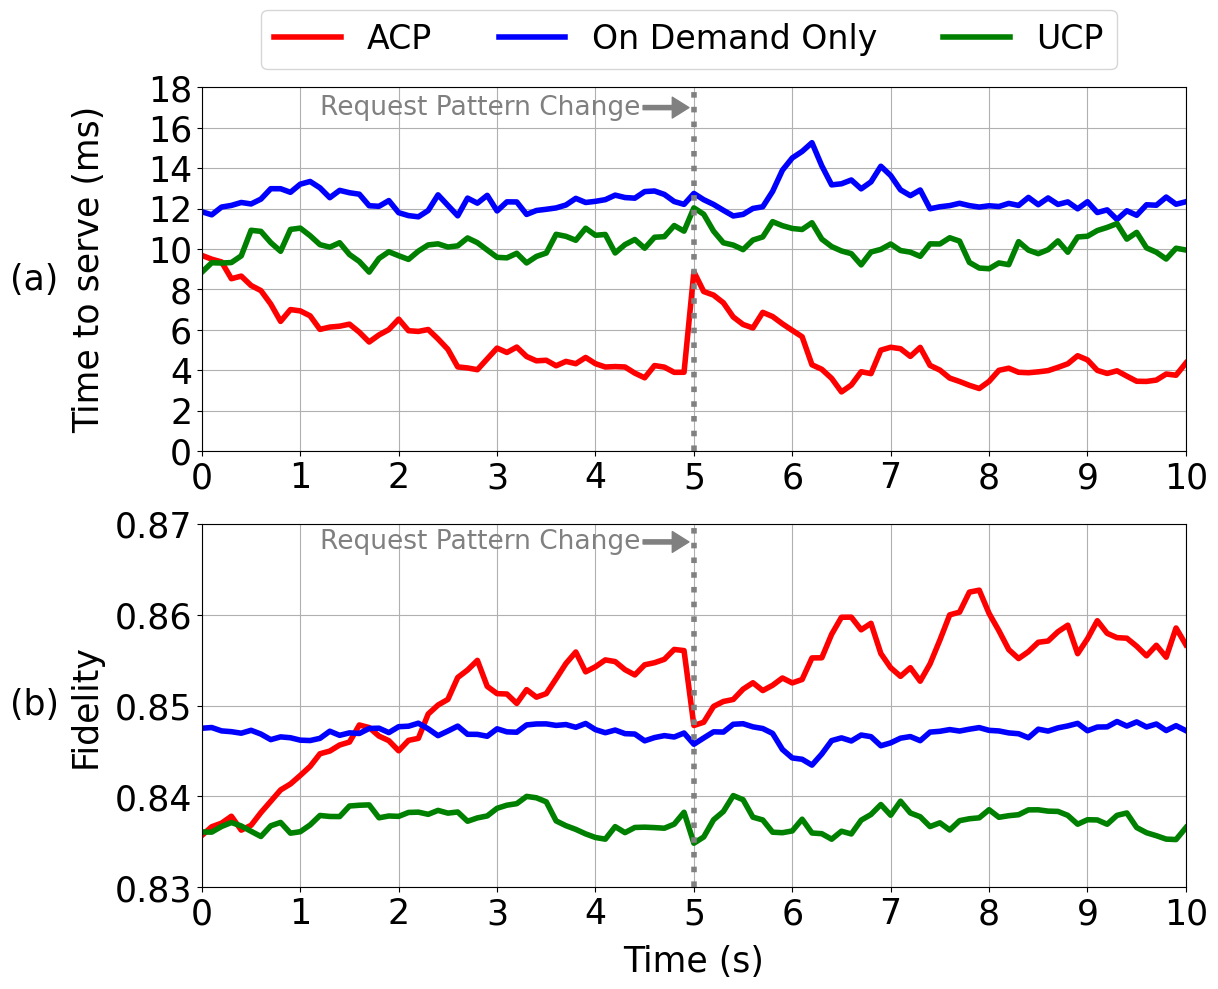

In [166]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
fig.subplots_adjust(top=0.9, bottom=0.1, left=0.16, right=0.98, hspace=0.2)
axes[0].plot(y_ma5_acp_tts, color='red', label='ACP')
axes[0].plot(y_ma0_tts, color='blue', label='On Demand Only')
axes[0].plot(y_ma5_ucp_tts, color='green', label='UCP')
axes[0].grid()
axes[0].set_xlim((0, 100))
axes[0].set_ylim((0, 18))
axes[0].set_ylabel('Time to serve (ms)', labelpad=30)
axes[0].text(-19.5, 8, '(a)')
yticks = list(range(0, 20, 2))
axes[0].set_yticks(yticks)
xticks = list(range(0, 101, 10))
xticklabels = [x//10 for x in xticks]
axes[0].set_xticks(xticks)
axes[0].set_xticklabels(xticklabels)
axes[0].vlines(x=50, ymin=0, ymax=18, linestyle=':', colors='grey')
arrowprops = dict(color='grey', width=3, headwidth=15)
axes[0].annotate('Request Pattern Change', xy=(49.5, 17), xytext=(12, 17), arrowprops=arrowprops, fontsize=19, va='center', color='grey')

axes[1].plot(y_ma5_acp_fid, color='red', label=f'ACP')
axes[1].plot(y_ma0_fid, color='blue', label=f'On Demand Only')
axes[1].plot(y_ma5_ucp_fid, color='green', label=f'UCP')
axes[1].grid()
axes[1].set_ylim((0.83, 0.87))
yticks = [0.83, 0.84, 0.85, 0.86, 0.87]
axes[1].set_yticks(yticks)
axes[1].set_ylabel('Fidelity', labelpad=9)
axes[1].set_xlim((0, 100))
axes[1].set_xlabel('Time (s)', labelpad=10)
axes[1].legend(ncol=3, loc=(0.06, 2.25), fontsize=23.9)
axes[1].text(-19.5, 0.849, '(b)')
axes[1].set_xticks(xticks)
axes[1].set_xticklabels(xticklabels)
axes[1].vlines(x=50, ymin=0, ymax=0.87, linestyle=':', colors='grey')
arrowprops = dict(color='grey', width=3, headwidth=15)
axes[1].annotate('Request Pattern Change', xy=(49.5, 0.868), xytext=(12, 0.868), arrowprops=arrowprops, fontsize=19, va='center', color='grey')


fig.savefig('20bottleneck.png')